In [393]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import math

In [394]:
def compute_resistence(vi, vo):
    return (vi - vo) * (2000 / vo)

In [395]:
def get_resistance(file_name):
    data = pd.read_csv(file_name)
#     plt.scatter(data['time'], data['input'], s=1, label=filename)
#     plt.scatter(data['time'], data['output'], s=1, label=filename)

    #     print(data['input'][0], data['output'][0])
    # get_resistence(data['input'][0], data['output'][0])

    resistances = []
    for i in range(len(data)):
        if (data['output'][i] == 0):
            continue
        resistances.append(compute_resistence(data['input'][i], data['output'][i]))
    if (len(resistances) < 70):
        return -1
    return sum(resistances) / len(resistances)
    
# filename = "data/2_16_100"
# print(get_resistance(filename))


In [396]:

def parse_test(test):
    dic = {}
    for child in test:
        dic[child.tag] = child.text
    return dic


def plot_r(chip, cell):
    tree = ET.parse('data/meta.xml')
    tests = tree.getroot()
    rs = []
    vs = []
    for test in tests:
        dic = parse_test(test)
        if (int(dic['chip']) != chip or int(dic['cell']) != cell):
            continue
        r = get_resistance(dic['file'])
        if (r == -1):
            continue
        rs.append(r)
        vs.append((float)(dic['voltage']))
    plt.plot(vs[0:], rs[0:], label=str(chip)+'_'+str(cell))
    plt.legend()


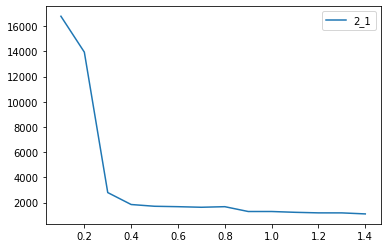

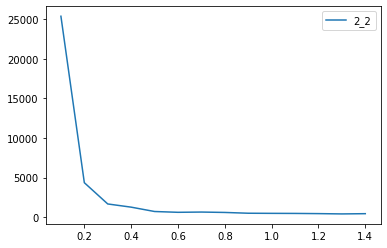

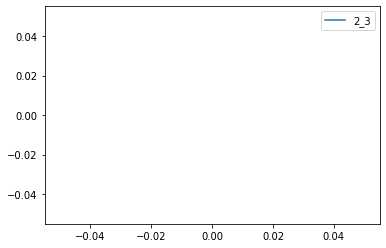

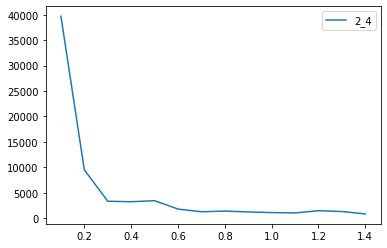

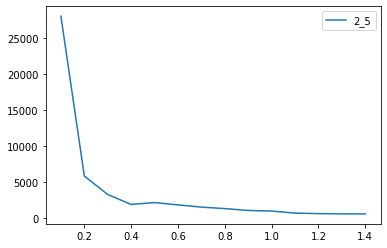

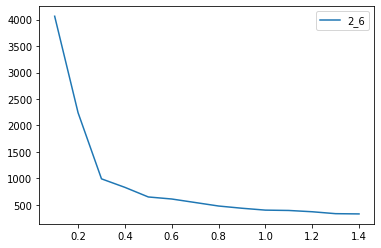

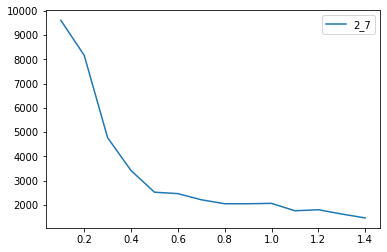

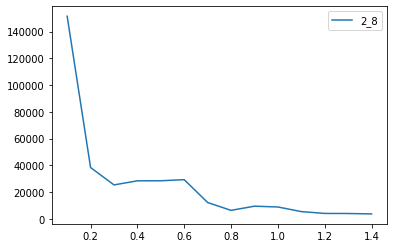

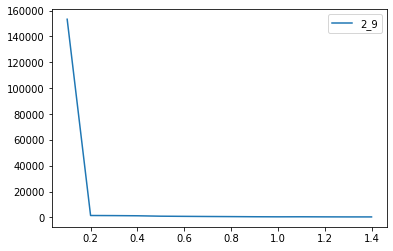

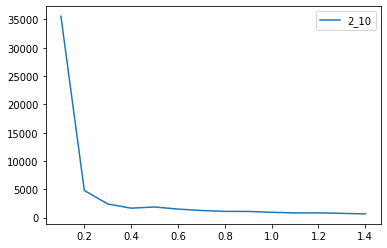

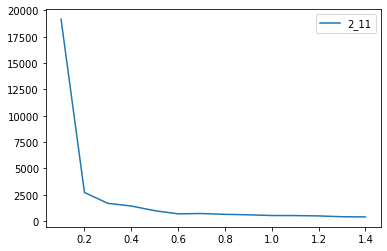

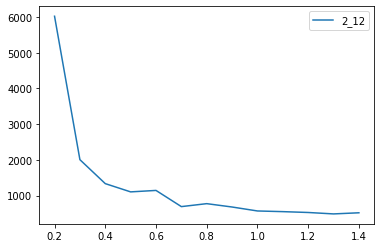

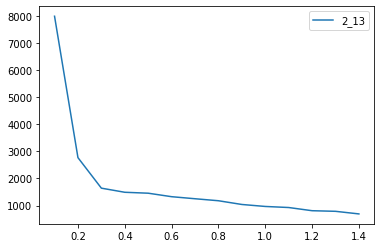

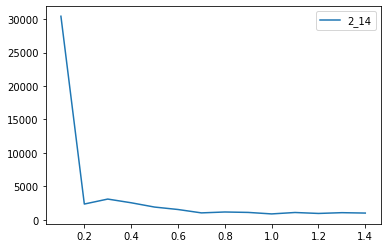

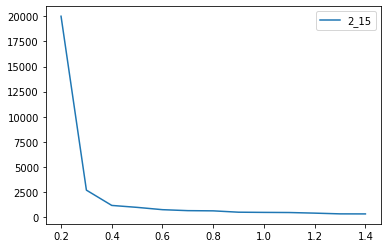

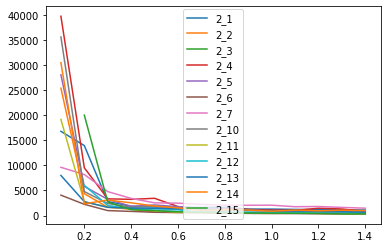

In [398]:
for i in range(1, 16):
#     if (i == 8 or i == 9): continue
    plot_r(2, i)
    plt.figure()
    
for i in range(1, 16):
    if (i == 8 or i == 9): continue
    plot_r(2, i)

# plot_r(2, 16)